In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load the dataset
df = pd.read_csv("AugustCancer.csv")

In [3]:
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Train a Random Forest Classifier to get important features
rf_classifier = RandomForestClassifier(random_state=42)
X = df.drop(['id', 'diagnosis'], axis=1)  
y = df['diagnosis']
rf_classifier.fit(X, y)

RandomForestClassifier(random_state=42)

In [5]:
# Get top 8 important features
imp_features = rf_classifier.feature_importances_

In [6]:
sorted_feature_indices = np.argsort(imp_features)[::-1]

In [7]:
top_8_feature_indices = sorted_feature_indices[:8]
top_8_feature_names = X.columns[top_8_feature_indices]

In [8]:
# Create dataframe with important features and target
X_important = df[top_8_feature_names]

In [9]:
le_diagnosis = LabelEncoder()
df['diagnosis_n'] = le_diagnosis.fit_transform(df['diagnosis'])

In [10]:
X_important_full = pd.concat([X_important, df['diagnosis_n']], axis=1)

In [11]:
# Split data for training and testing
target_feature = X_important_full['diagnosis_n']

In [12]:
final_features = X_important_full.drop(['diagnosis_n'], axis=1)

In [13]:
from matplotlib import pyplot as plt

In [14]:
%matplotlib inline

In [17]:
df0=X_important_full[X_important_full.diagnosis_n==0]
df1=X_important_full[X_important_full.diagnosis_n==1]

In [18]:
df0.head()

,area_worst,concave points_worst,concave points_mean,radius_worst,perimeter_worst,perimeter_mean,concavity_mean,area_mean,diagnosis_n
19,711.2,0.12880,0.047810,15.110,99.70,87.46,0.06664,566.3,0
20,630.5,0.07283,0.031100,14.500,96.09,85.63,0.04568,520.0,0
21,314.9,0.06227,0.020760,10.230,65.13,60.34,0.02956,273.9,0
37,545.9,0.05013,0.029230,13.300,84.46,82.61,0.02562,523.8,0
46,242.2,0.02564,0.005917,8.964,57.26,51.71,0.01588,201.9,0


In [19]:
df1.head()

,area_worst,concave points_worst,concave points_mean,radius_worst,perimeter_worst,perimeter_mean,concavity_mean,area_mean,diagnosis_n
0,2019.0,0.2654,0.14710,25.38,184.60,122.80,0.3001,1001.0,1
1,1956.0,0.1860,0.07017,24.99,158.80,132.90,0.0869,1326.0,1
2,1709.0,0.2430,0.12790,23.57,152.50,130.00,0.1974,1203.0,1
3,567.7,0.2575,0.10520,14.91,98.87,77.58,0.2414,386.1,1
4,1575.0,0.1625,0.10430,22.54,152.20,135.10,0.1980,1297.0,1


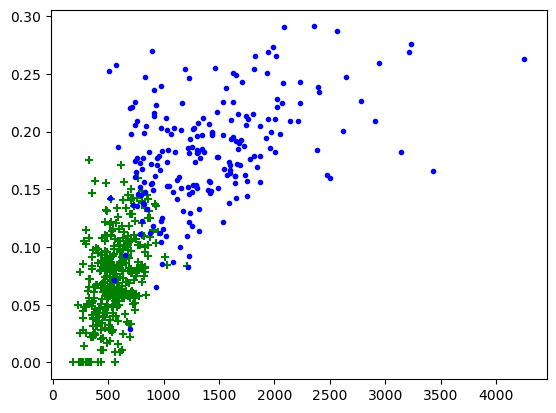

In [21]:
plt.scatter(df0['area_worst'],df0['concave points_worst'],color='green',marker='+')
plt.scatter(df1['area_worst'],df1['concave points_worst'],color='blue',marker='.')

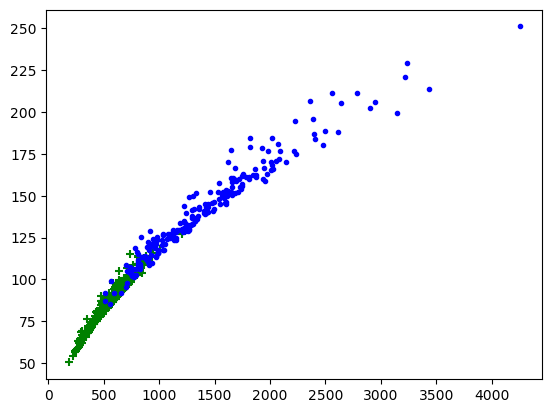

In [22]:
plt.scatter(df0['area_worst'],df0['perimeter_worst'],color='green',marker='+')
plt.scatter(df1['area_worst'],df1['perimeter_worst'],color='blue',marker='.')

In [23]:
from sklearn.model_selection import train_test_split

In [45]:
X_train,X_test,y_train,y_test=train_test_split(final_features,target_feature,test_size=0.2)

In [46]:
len(X_train)

455

In [47]:
from sklearn.svm import SVC
model=SVC()

In [48]:
model.fit(X_train,y_train)

SVC()

In [49]:
model.score(X_test,y_test)

0.9298245614035088

In [50]:
model.predict([[11.0,0.5,0.2,0.04,28.0,18.0,0.14,11.0]])

/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])